In [1]:
import pandas as pd
import os
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

In [2]:
parentdir = os.getcwd().replace('scripts','')

In [3]:
grids = gpd.read_file(parentdir + 'assets/india_grid/grids-0.1x0.1deg/grids_india.shp')
df = pd.read_csv(parentdir + 'data/indiasubcont_satpm_allyears.csv')

In [4]:
year = 1998

In [5]:
def bin(x):
    if x< 5:
        return 0 #Dark Green
    elif x < 20:
        return 1 #Light Green
    elif x < 40:
        return 2 #Light brown
    elif x < 50:
        return 3 #Medium Brown
    elif x < 60:
        return 4 #Light orange
    elif x < 80:
        return 5 #Orange
    elif x < 100:
        return 6 #Red
    else:
        return 7 #Dark brown

In [6]:
# Load base map shapefile
base_map = gpd.read_file(parentdir + "/assets/INDIA_STATES.geojson")
base_map['common'] = 'c'
india = base_map.dissolve('common')

In [7]:
grids['value'] = df['Y'+str(year)].values

In [8]:
grids['bin'] = grids["value"].apply(bin)

In [9]:
grids.head()

,Maille,Maille_Y,Maille_X,X,Y,X1,Y1,X2,Y2,area_cell,geometry,value,bin
0,1,1,1,67.05,7.05,67.0,7.0,67.1,7.1,129.551925,"POLYGON ((67.00000 7.10000, 67.10000 7.10000, ...",0.0,0
1,2,1,2,67.15,7.05,67.1,7.0,67.2,7.1,129.441074,"POLYGON ((67.10000 7.10000, 67.20000 7.10000, ...",0.0,0
2,3,1,3,67.25,7.05,67.2,7.0,67.3,7.1,129.331145,"POLYGON ((67.20000 7.10000, 67.30000 7.10000, ...",0.0,0
3,4,1,4,67.35,7.05,67.3,7.0,67.4,7.1,129.222135,"POLYGON ((67.30000 7.10000, 67.40000 7.10000, ...",0.0,0
4,5,1,5,67.45,7.05,67.4,7.0,67.5,7.1,129.114042,"POLYGON ((67.40000 7.10000, 67.50000 7.10000, ...",0.0,0


In [12]:
colors = ['#006634', #Dark Green
          '#33cc33', #Light green
          '#cccd33', #Light brown
          '#c09d01', #Medium brown
          '#ffcc00', #Light orange
          '#fe6635', #Orange
          '#fe0000', #Red
          '#653331' #Dark Brown
          ]  # Define your colors
cmap_name = 'custom_cmap'

# Create the colormap
custom_cmap = LinearSegmentedColormap.from_list(cmap_name, colors, N=len(colors))

In [25]:
#Masking
grids_masked = gpd.sjoin(grids, india, op='intersects')

/home/krishna/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3377: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/tmp/ipykernel_9944/3940126558.py:2: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  grids_masked = gpd.sjoin(grids, india, op='intersects')


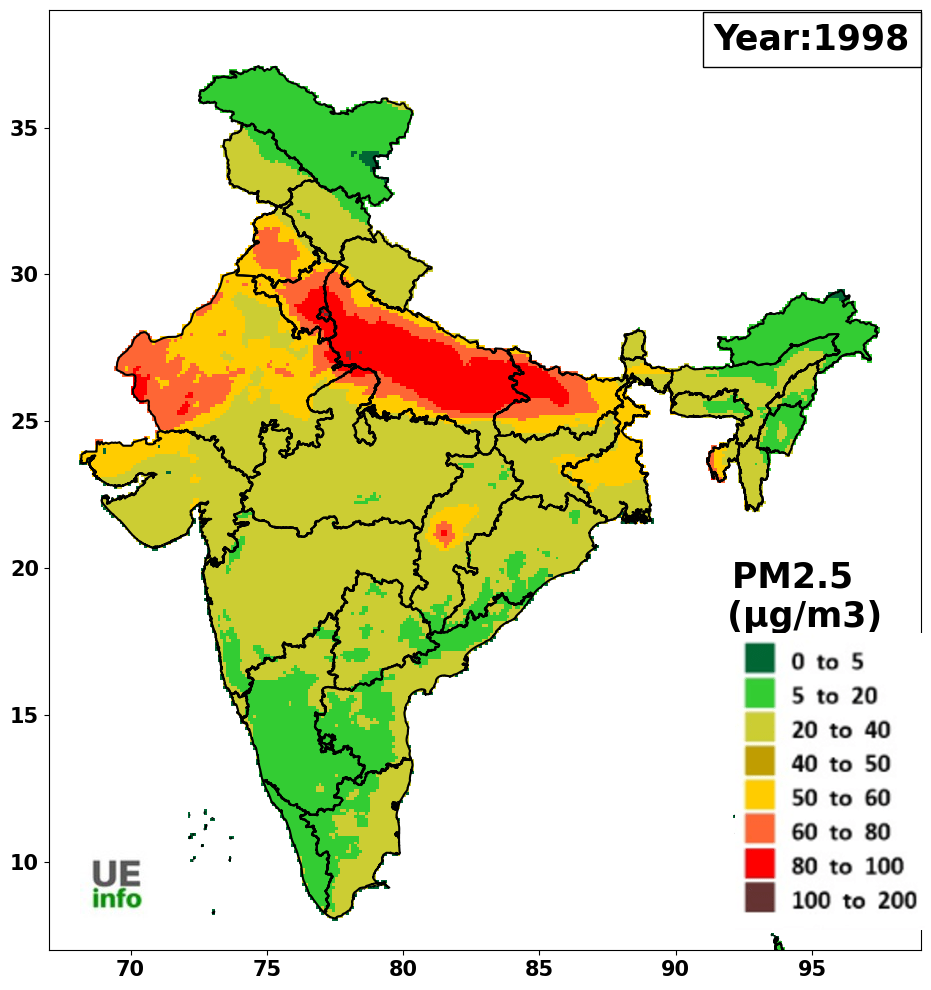

In [29]:
fig, ax = plt.subplots(figsize=(10, 10))

## Plot grids for full extent map
# grids.plot(column='bin',
#                 cmap=custom_cmap,
#                 alpha=1,
#                 #legend=True,
#                 ax=ax)

## Plot grids_masked for the masked map
grids_masked.plot(column='bin',
                cmap=custom_cmap,
                alpha=1,
                #legend=True,
                ax=ax)
# Plot base map
base_map.boundary.plot(ax=ax, color="black")

# Add legend
#plt.colorbar(label="Grid Values")

# Set limits to tightly fit the data
ax.set_xlim(grids.X1.min(), grids.X2.max())
ax.set_ylim(grids.Y1.min(), grids.Y2.max())

plt.xticks(weight = 'bold', fontsize=15)
plt.yticks(weight = 'bold', fontsize=15)
# Add title
#plt.title("Year: {}".format(year))

#Add year - month annotation
bbox_props = dict(boxstyle="square,pad=0.3", fc="white", ec="black", lw=1)
plt.text(95, 38,
         'Year:{}'.format(str(year)),
         fontsize=25, fontweight='bold', color='black',
         ha='center', va='center',
             bbox=bbox_props)
    
# Load the image
logo = plt.imread(parentdir + '/assets/UEinfo_logo3_resized_70.jpg')  # Provide the path to your image file
plt.figimage(logo, xo=80, yo=70)

legend_img = plt.imread(parentdir + '/assets/legend_mask_resized.png')  # Provide the path to your image file
plt.figimage(legend_img, xo=735, yo=60)

bbox_props = dict(boxstyle="square,pad=0.3", fc="white", ec="white", lw=1)
plt.text(94.5, 19,
         'PM2.5 \n (μg/m3)',
         fontsize=25, fontweight='bold', color='black',
         ha='center', va='center',
             bbox=bbox_props)

plt.tight_layout()

plt.savefig(parentdir +"/plots/INDIAGRIDS_WUSTL_{}_masked.png".format(year))